In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os, keras
from sklearn.preprocessing import RobustScaler,StandardScaler, LabelEncoder, OneHotEncoder
import cv2

In [4]:
SIZE = 64
BATCH_SIZE = 128


In [7]:
train_dir = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,  
    subset="training",     
    seed=123,              
    image_size=(SIZE,SIZE), 
    batch_size=BATCH_SIZE,  
    color_mode='rgb',
    label_mode='categorical'
)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",   
    seed=123,             
    image_size=(SIZE,SIZE),
    batch_size=BATCH_SIZE,        
    color_mode='rgb',
    label_mode='categorical'
)


Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


In [10]:
test_dir = '/kaggle/input/asl-alphabet/asl_alphabet_test'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,  
    seed=123,     
    batch_size=BATCH_SIZE,        
    image_size=(SIZE,SIZE),         
    color_mode='rgb',
    label_mode='categorical',
    shuffle = False
)


Found 28 files belonging to 1 classes.


In [12]:
model = tf.keras.models.Sequential([
    
    # Rescale images to the range [0, 1]
    tf.keras.layers.Rescaling(1./255, input_shape=(SIZE, SIZE, 3)),

    # Convolutional layers with ReLU activation and MaxPooling
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    # Flattening the output from the convolutional layers
    tf.keras.layers.Flatten(),

    # Dense layers
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    # Output layer with softmax activation (for 29 classes)
    tf.keras.layers.Dense(units=29, activation='softmax')
])

In [13]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy (),
              metrics=['accuracy'])

In [14]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10


I0000 00:00:1724438449.946005     158 service.cc:145] XLA service 0x7efab4004b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724438449.946063     158 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724438449.946073     158 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  4/544 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.0306 - loss: 3.9373  

I0000 00:00:1724438455.534490     158 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


544/544 ━━━━━━━━━━━━━━━━━━━━ 119s 204ms/step - accuracy: 0.2641 - loss: 2.6520 - val_accuracy: 0.4822 - val_loss: 1.5868
Epoch 2/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step - accuracy: 0.7757 - loss: 0.7619 - val_accuracy: 0.8387 - val_loss: 0.4780
Epoch 3/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step - accuracy: 0.9155 - loss: 0.3004 - val_accuracy: 0.9398 - val_loss: 0.1905
Epoch 4/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - accuracy: 0.9523 - loss: 0.1650 - val_accuracy: 0.7828 - val_loss: 0.7783
Epoch 5/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - accuracy: 0.9678 - loss: 0.1110 - val_accuracy: 0.9481 - val_loss: 0.1472
Epoch 6/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 33s 61ms/step - accuracy: 0.9769 - loss: 0.0763 - val_accuracy: 0.8507 - val_loss: 0.5150
Epoch 7/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 34s 63ms/step - accuracy: 0.9800 - loss: 0.0666 - val_accuracy: 0.9549 - val_loss: 0.1349
Epoch 8/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 35s 63ms/step - accuracy: 0.9822 - loss: 0.0583 - val_accur

In [15]:
model.save('model_3.h5')

In [17]:
test_loss, test_acc = model.evaluate(val_ds)

136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9801 - loss: 0.0587


In [18]:
test_acc

0.9796551465988159

In [19]:
test_loss, test_acc = model.evaluate(train_ds)

544/544 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.9859 - loss: 0.0417


In [20]:
test_acc

0.9859051704406738

In [21]:
for x, y in test_ds.take(1):
    print(x.shape)

(28, 64, 64, 3)


In [23]:
predictions = model.predict(x)
predicted_class = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


TypeError: Image data of dtype object cannot be converted to float

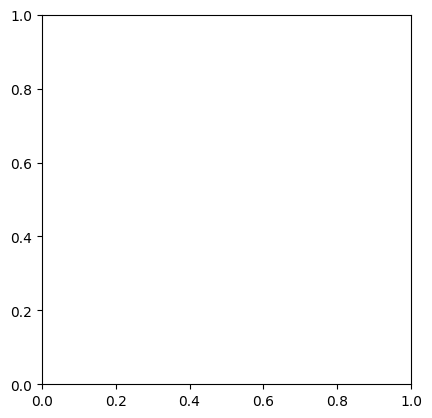

In [32]:
plt.imshow(test_ds)

In [25]:
train_ds.class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']